Clustering is used to group existing data of which the common characteristics are unknown or in
which case we want to discover them. These methods attempt to create center points and
hierarchies to differentiate groups and discover common characteristics by proximity.

In this example, we will use a data set in which the personality traits of Twitter users were analyzed
as inputs. 140 users with 9 different work activities have been filtered. Based on a psychology
methodology known as “Ocean: The Big Five” we tend to have the following input characteristics:
*   username (the name on Twitter)
*  op - Openness to experience – degree of open-mindedness to new experiences, curiosity, art.
*  co - Conscientiousness – degree of orderliness, neatness, organization.
* ex - Extraversion – degree of shyness, loneliness or participation in a social group.
* ag - Agreeableness – degree of empathy with others, temperament.
* ne - Neuroticism, – degree of neuroticism, nervousness, irritability, self-confidence.
* Wordcount – Average number of words used in one’s tweets.
* Category – User's work activity (actor, singer, etc.).
We will start by importing the libraries that will help us execute the algorithm and create the graph

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
import csv

In [54]:
#Library and config for 3D plots
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

Read the data and obtain statistical information from it.

In [55]:
#fix this so it works with kmeans
import os
os.environ['OMP_NUM_THREADS'] = '1'

plt.ion()

# Read the data
dataframe = pd.read_csv('analysis.csv',
                        sep=',', encoding='utf-8')

print(dataframe.head())

print(dataframe.describe())

              user         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  
               op          co          ex          ag          ne   wordcount  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756   18.693542    9.305985    

Visualize the data to get an idea of its dispersion.

<ipython-input-56-cbfff2bddb64>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


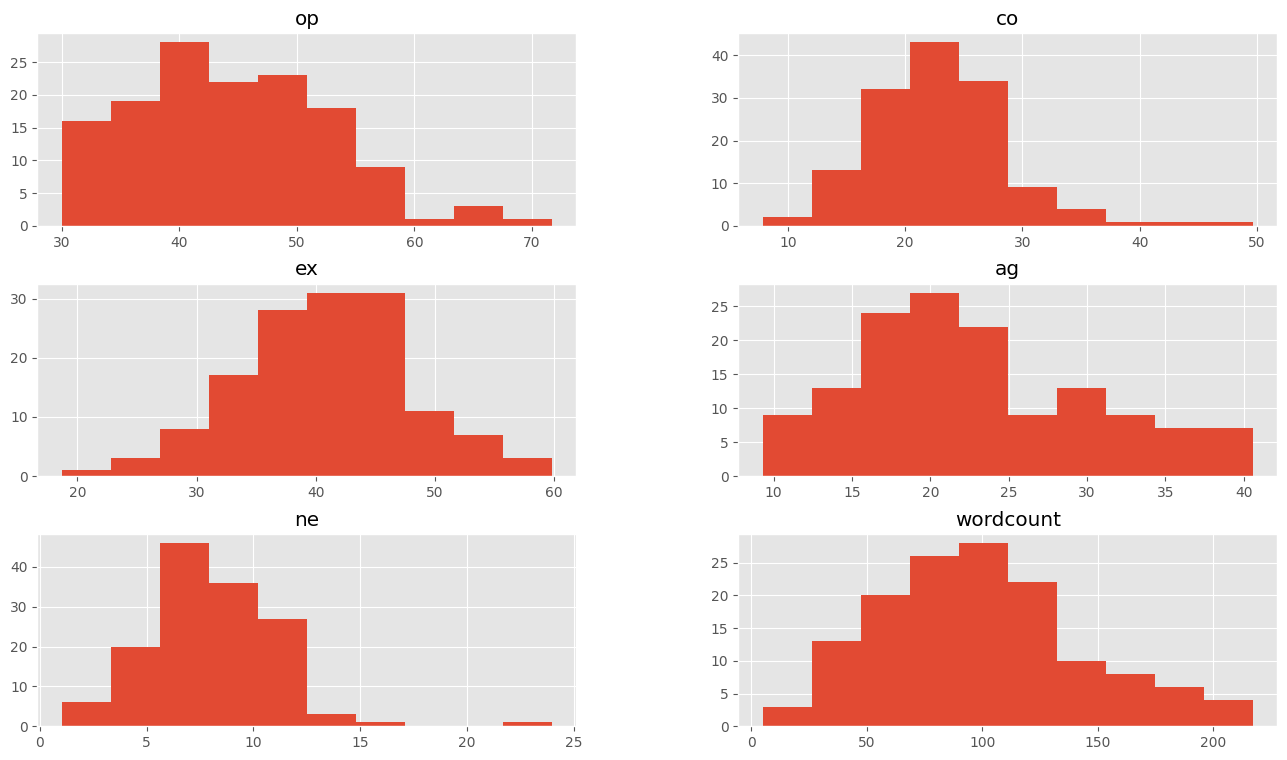

In [56]:
#visualize data to see data dispersion
dataframe.drop(['categoria'],1).hist()
plt.show()

In this case, select three features (op, ex and ag) and cross-reference them to see if they give
us any clue as to their grouping and relationship with their categories.

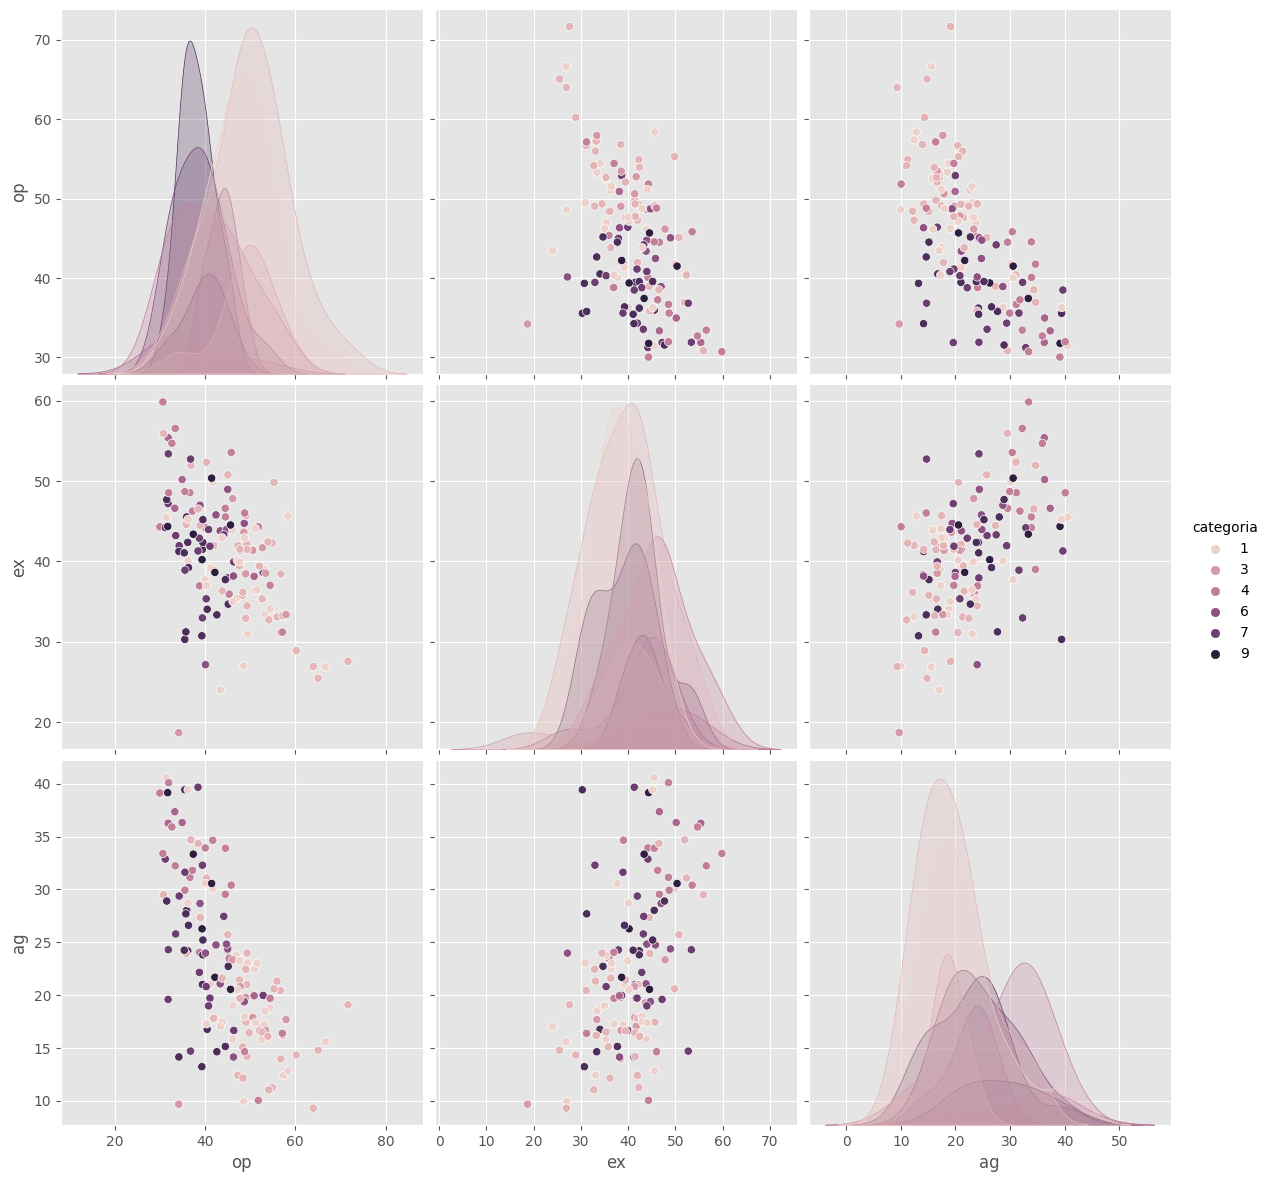

In [57]:
# select three features (op, ex and ag) and cross reference them to see if they indicate relationships with categories
sb.pairplot(dataframe.dropna(),hue='categoria', height=4, vars=['op','ex','ag'], kind='scatter')

Specify the data structure that will be used to feed the algorithm. As can be seen, we only load
the columns op, ex and ag in the X variable.

In [58]:
#specifiy data structure to be used to feed algorithm
#only load colums op, ex and ag
X = np.array(dataframe[['op','ex','ag']])
y=np.array(dataframe['categoria']).astype(int)
X.shape


(140, 3)

Below is a 3D graph with 9 colors representing the categories.

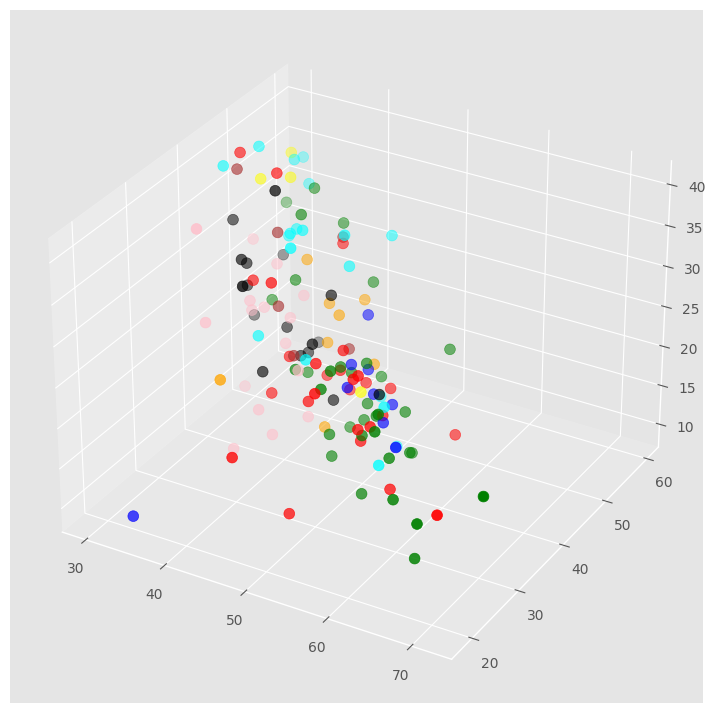

In [59]:
#draw 9 categories in 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Modified this line
colors = ['white','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
assign = []

for row in y:
    assign.append(colors[row])


ax.scatter(X[:,0], X[:,1], X[:,2], c=assign, s=60)


Find the value of K by making a graph and trying to find the elbow mentioned earlier.

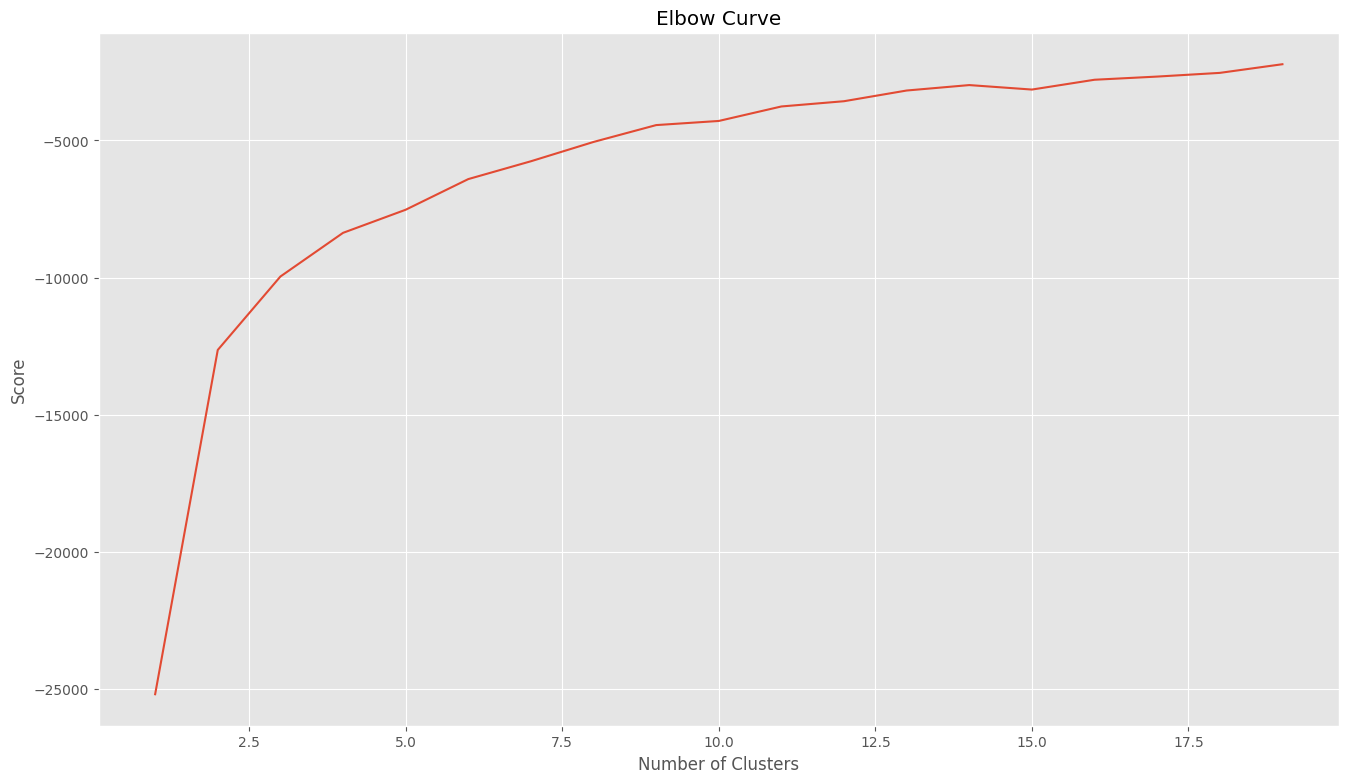

In [60]:
# Obtain value of K
nc = range(1,20)

kmeans = [KMeans(n_clusters=i, n_init=1) for i in nc]
kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

fig = plt.figure()
plt.plot(nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [61]:
# 5 is a good number for k
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[50.73809617 40.40047483 17.42637107]
 [35.90241306 47.56828232 33.58748762]
 [43.42489342 32.20419121 19.27634421]
 [60.35359892 30.299381   15.71781133]
 [40.22889929 42.87666588 23.44923068]]


Now take a look at the 3D graph below with colors for the groups and see if they differ.

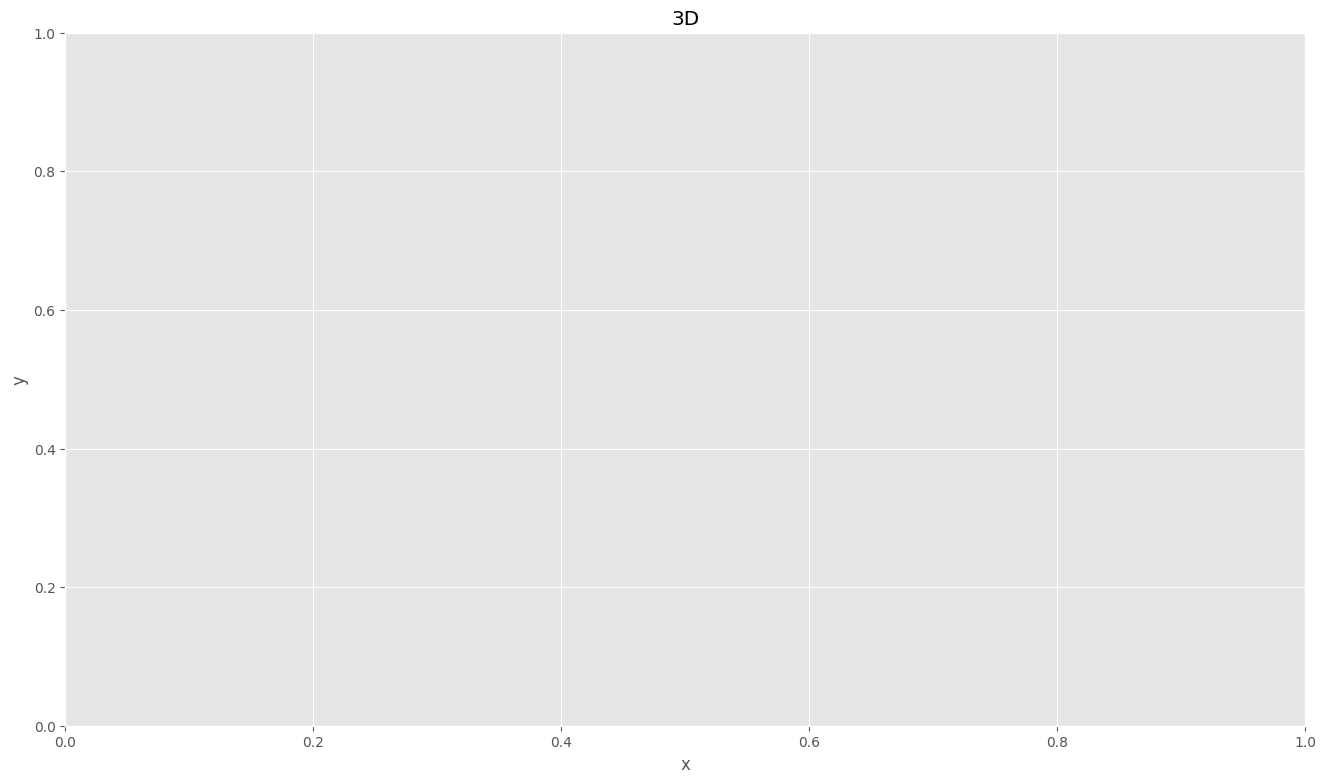

In [69]:
# Predicting clusters
labels = kmeans.predict(X)

# Get cluster
C = kmeans.cluster_centers_
colors = ['red', 'green','blue','cyan','yellow']
assign = []
for row in labels:
    assign.append(colors[row])

#draw 3d graph of clusters
fig = plt.figure()

plt.title('3D')
plt.xlabel('x')
plt.ylabel('y')


ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=assign, s=60)
ax.scatter(C[:,0], C[:,1],C[:,2], marker='*', c=colors, s=1000)
plt.show()

Let’s look at it in two-dimensional graphs to better visualize the groups and their classification.

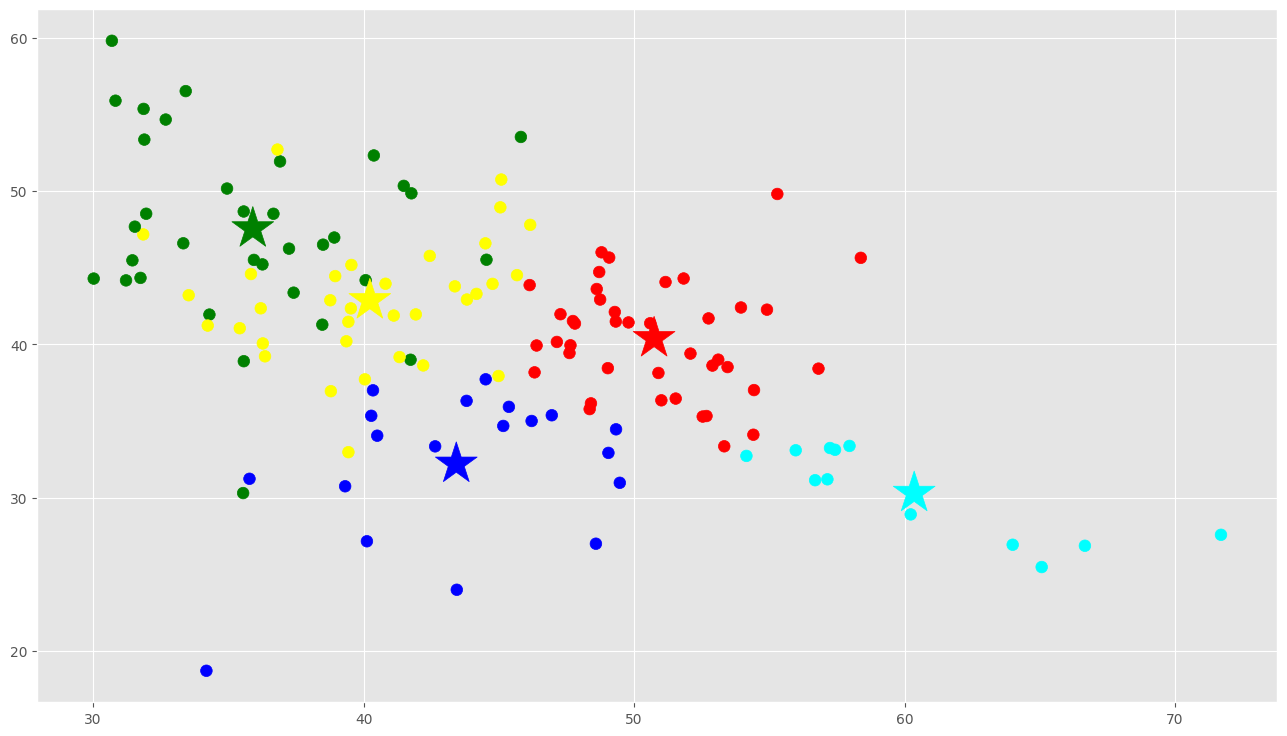

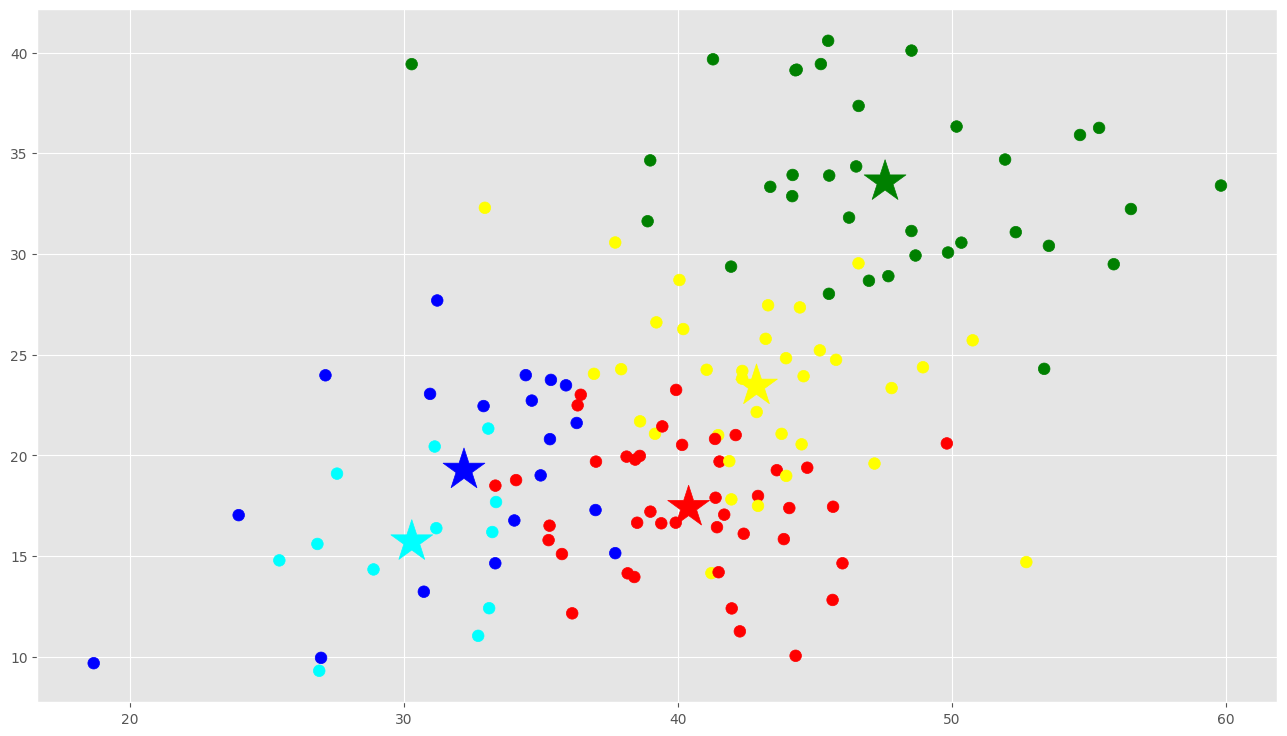

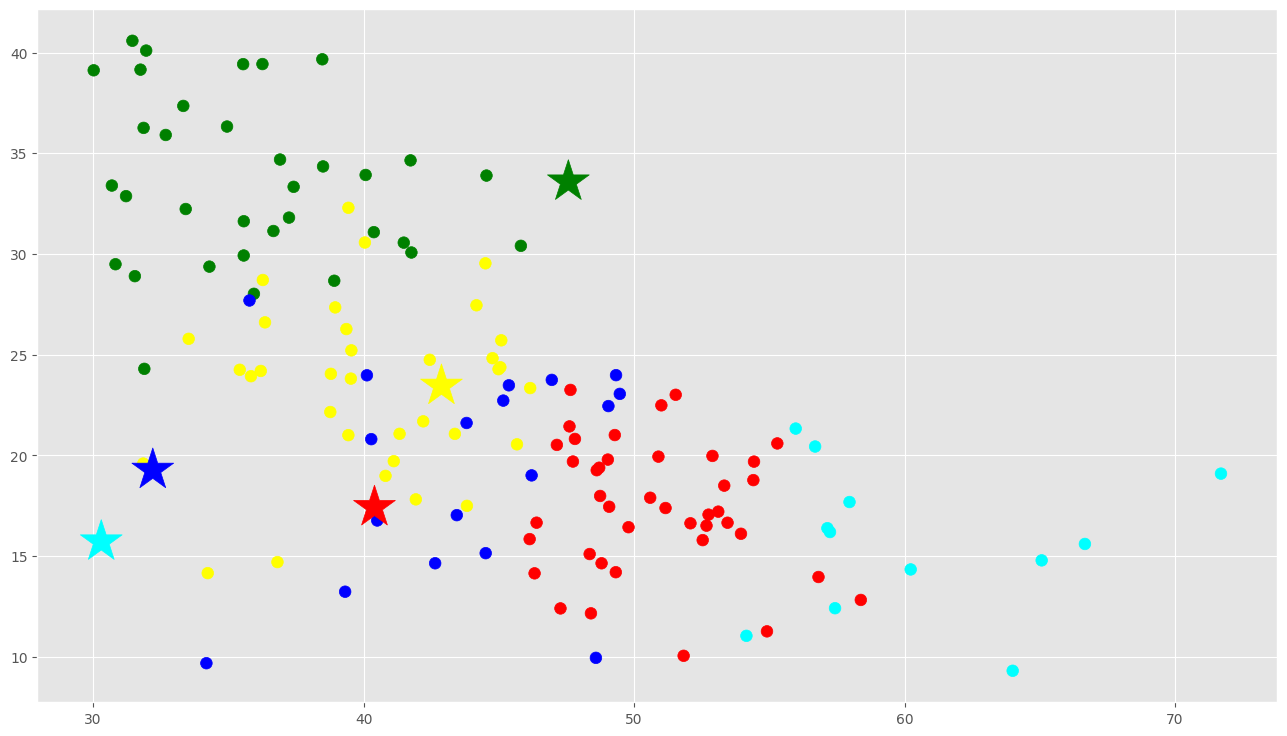

In [71]:
# PLOT groups for op/ex features
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

fig = plt.figure()
plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:,0], C[:,1], marker='*', c=colors, s=1000)
plt.show()

# PLOT groups for ex/ag features
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

fig = plt.figure()
plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:,1], C[:,2], marker='*', c=colors, s=1000)
plt.show()



# PLOT groups for op/ag features
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

fig = plt.figure()
plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:,1], C[:,2], marker='*', c=colors, s=1000)
plt.show()

